# Preparation

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile,os
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
!pip install split_folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Dataset Data Science Teti'

/content/drive/MyDrive/Dataset Data Science Teti


In [ ]:
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.2 MB/s 
     |████████████████████████████████| 6.6 MB 52.6 MB/s 
     |████████████████████████████████| 101 kB 9.7 MB/s 
     |████████████████████████████████| 596 kB 70.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os, sys

import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim

import transformers
from transformers import AutoTokenizer, AutoModel
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import AlbertForSequenceClassification, AlbertTokenizer, AlbertConfig
from nltk.tokenize import TweetTokenizer, word_tokenize

# from utils.forward_fn import forward_sequence_classification
# from utils.metrics import document_sentiment_metrics_fn
# from utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
# from utils.data_utils import EmotionDetectionDataset, EmotionDetectionDataLoader
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

from sklearn.model_selection import train_test_split

In [ ]:
from time import time
import re
import sys
import csv
csv.field_size_limit(sys.maxsize)

import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('indonesian')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import itertools
import datetime
import pprint
import warnings 
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pdObj = pd.read_json('Training Labeled Dataset.json')
pdObj.to_csv(index=False)
pdObj.to_csv('data.csv')
!cp data.csv "/content/drive/MyDrive/Dataset Data Science Teti"

cp: 'data.csv' and '/content/drive/MyDrive/Dataset Data Science Teti/data.csv' are the same file


# Cleaning

Tahap pertama dalam training data adalah import menggunakan library pandas dan mengetahui jumlah kolom dan baris pada dataset

In [ ]:
df = pd.read_csv('data.csv',header = 0, lineterminator ='\n')
df = df.applymap(lambda x:x.strip() if isinstance(x,str) else x)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')
df = df.drop(['Unnamed: 0'],axis = 1)
df.dropna(axis = 0, how='all', inplace = True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set after removing empty rows')

df

There are 169227 rows and 3 columns in the training set
There are 169227 rows and 2 columns in the training set after removing empty rows


,genre,text
0,Horor,'\n \n\n gerbang\n \n\n tumuju\n \n\n peten...
1,Fantasi,"Miana terhenyak, seketika mengerti maksud ucap..."
2,Fiksi Ilmiah,Gabriel tahu betapa kuatnya itu dan membuka ma...
3,Fiksi Remaja,Semua itu hanya\n \n semoga.\n \n Kita tidak ...
4,Fantasi,Mereka akhirnya tiba di sini karena bertemu de...
...,...,...
169222,Fantasi,Terlambat. Arelia keburu pergi dari hadapan Da...
169223,Horor,"""Hujan ini bukan hujan alami,"" ucap Cakra. ""In..."
169224,Fiksi Remaja,HAHAHA\n \n\n\n\n Maap\n \n\n bgt baru up\n ...
169225,Fiksi Ilmiah,"""Memikirkannya, saya belum benar-benar memperh..."


In [ ]:
test = pd.read_csv('Prediction Case.csv',header = 0, lineterminator ='\n')
test = test.applymap(lambda x:x.strip() if isinstance(x,str) else x)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')
df.dropna(axis = 0, how='all', inplace = True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set after removing empty rows')

df

There are 169227 rows and 2 columns in the training set
There are 169227 rows and 2 columns in the training set after removing empty rows


,genre,text
0,Horor,'\n \n\n gerbang\n \n\n tumuju\n \n\n peten...
1,Fantasi,"Miana terhenyak, seketika mengerti maksud ucap..."
2,Fiksi Ilmiah,Gabriel tahu betapa kuatnya itu dan membuka ma...
3,Fiksi Remaja,Semua itu hanya\n \n semoga.\n \n Kita tidak ...
4,Fantasi,Mereka akhirnya tiba di sini karena bertemu de...
...,...,...
169222,Fantasi,Terlambat. Arelia keburu pergi dari hadapan Da...
169223,Horor,"""Hujan ini bukan hujan alami,"" ucap Cakra. ""In..."
169224,Fiksi Remaja,HAHAHA\n \n\n\n\n Maap\n \n\n bgt baru up\n ...
169225,Fiksi Ilmiah,"""Memikirkannya, saya belum benar-benar memperh..."


Dikarenakan training merupakan pelatihan model machine learning menggunakan data kuantitatif, sehingga genre akan kami valuasi menjadi integer yaitu 0,1,2,3. Setelah itu kami menaruhnya pada kolom baru bernama label

In [ ]:
conditions = [
    (df['genre'] == "Horor"),
    (df['genre'] == "Fantasi"),
    (df['genre'] == "Fiksi Ilmiah"),
    (df['genre'] == "Fiksi Remaja")
]

values = [0,1,2,3]

df['label'] = np.select(conditions, values)
df

,genre,text,label
0,Horor,'\n \n\n gerbang\n \n\n tumuju\n \n\n peten...,0
1,Fantasi,"Miana terhenyak, seketika mengerti maksud ucap...",1
2,Fiksi Ilmiah,Gabriel tahu betapa kuatnya itu dan membuka ma...,2
3,Fiksi Remaja,Semua itu hanya\n \n semoga.\n \n Kita tidak ...,3
4,Fantasi,Mereka akhirnya tiba di sini karena bertemu de...,1
...,...,...,...
169222,Fantasi,Terlambat. Arelia keburu pergi dari hadapan Da...,1
169223,Horor,"""Hujan ini bukan hujan alami,"" ucap Cakra. ""In...",0
169224,Fiksi Remaja,HAHAHA\n \n\n\n\n Maap\n \n\n bgt baru up\n ...,3
169225,Fiksi Ilmiah,"""Memikirkannya, saya belum benar-benar memperh...",2


Terdapat 4 Function untuk cleaning text yang menggunakan Regular Expression. Fungsi pertama untuk menghilangkan character yang tidak penting. Fungsi kedua untuk menghilangkan elemen - elemen tertentu seperti \n yang sangat banyak pada data training.Fungsi ketiga untuk menghilangkan non alphanumeric dan fungsi terakhir untuk menghilangkan stopwords. Hal ini dilakukan agar model dapat memberikan training pada kata yang krusial bagi genre agar model lebih spesifik dalam menganalisa.

In [ ]:
def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text
    
def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text)
  text = text.strip()
  return text

In [ ]:
def preprocess(text, alay = False, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  return text
idn_stopwords = stopwords.words('indonesian')

In [ ]:
df["clean"] = df["text"].apply(str).apply(preprocess, args = (True, True,))
df["clean"] = df["clean"].replace("[^a-zA-Z#]", " ")
df["no_stopword_text"] = df["clean"].apply(remove_nonaplhanumeric).apply(remove_stopword)

In [ ]:
df.head()

,genre,text,label,clean,no_stopword_text
0,Horor,'\n \n\n gerbang\n \n\n tumuju\n \n\n peten...,0,' gerbang tumuju petengan ingkang Nyoto. Terbu...,gerbang tumuju petengan ingkang Nyoto Terbukal...
1,Fantasi,"Miana terhenyak, seketika mengerti maksud ucap...",1,"Miana terhenyak, seketika mengerti maksud ucap...",Miana terhenyak mengerti maksud ucapan Drayn A...
2,Fiksi Ilmiah,Gabriel tahu betapa kuatnya itu dan membuka ma...,2,Gabriel tahu betapa kuatnya itu dan membuka ma...,Gabriel betapa kuatnya membuka matanya Mata in...
3,Fiksi Remaja,Semua itu hanya\n \n semoga.\n \n Kita tidak ...,3,Semua itu hanya semoga. Kita tidak tau bagaima...,Semua semoga Kita tau Terima takdir Tuhan teta...
4,Fantasi,Mereka akhirnya tiba di sini karena bertemu de...,1,Mereka akhirnya tiba di sini karena bertemu de...,Mereka bertemu pengemudi kereta berjanggut ram...


In [ ]:
df_clean = df.drop(["text","genre","clean"], axis=1)
df_clean

,label,no_stopword_text
0,0,gerbang tumuju petengan ingkang Nyoto Terbukal...
1,1,Miana terhenyak mengerti maksud ucapan Drayn A...
2,2,Gabriel betapa kuatnya membuka matanya Mata in...
3,3,Semua semoga Kita tau Terima takdir Tuhan teta...
4,1,Mereka bertemu pengemudi kereta berjanggut ram...
...,...,...
169222,1,Terlambat Arelia keburu pergi hadapan Daza Gad...
169223,0,Hujan hujan alami Cakra Ini hujan ghaib Perlah...
169224,3,HAHAHA Maap bgt up Jan lupa vote oke Aku maksa
169225,2,Memikirkannya memperhatikan pergerakannya Inte...


In [ ]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 9.0 MB/s 
     |████████████████████████████████| 106 kB 69.1 MB/s 


In [ ]:
df_clean['total'] = df_clean['no_stopword_text'].apply(lambda x:[contractions.fix(word) for word in x.split(' ')])
# testing_data['total'] = testing_data['no_stopword_text'].apply(lambda x:[contractions.fix(word) for word in x.split(' ')])

In [ ]:
# training_data['total'] =[' '.join(map(str, l)) for l in training_data['total']]
# testing_data['total'] =[' '.join(map(str, l)) for l in testing_data['total']]

# Exploratory Data Analysis

In [ ]:
def plot(text) :
  stop = set(stopwords.words('indonesian'))
  new = text.str.split()
  new = new.values.tolist()
  corpus = [word for i in new for word in i]
  from collections import defaultdict
  dic = defaultdict(int)
  for word in corpus :
    if word in stop :
      dic[word] += 1
  top = sorted(dic.items(), key = lambda x:x[1],reverse = True)[:10]
  x,y = zip(*top)
  plt.figure(figsize =(10,10))
  plt.bar(x,y)

Berdasarkan dari grafik "Frekuensi Kata" dibawah, terlihat bahwa kata dengan frekuensi kemunculan terbanyak merupakan kata "orang" pada urutan pertama. Pada urutan kedua ditempati oleh kata "dia". Hal ini menunjukkan bahwa kata "orang" dan "dia" sering digunakan pada setiap genre novel. Pada urutan ketiga, kata "fang" banyak dijumpai pada dataset. Kata "fang" merupakan kata yang berasal dari genre "fiksi ilmiah" yang merupakan jumlah *class* genre terbanyak.

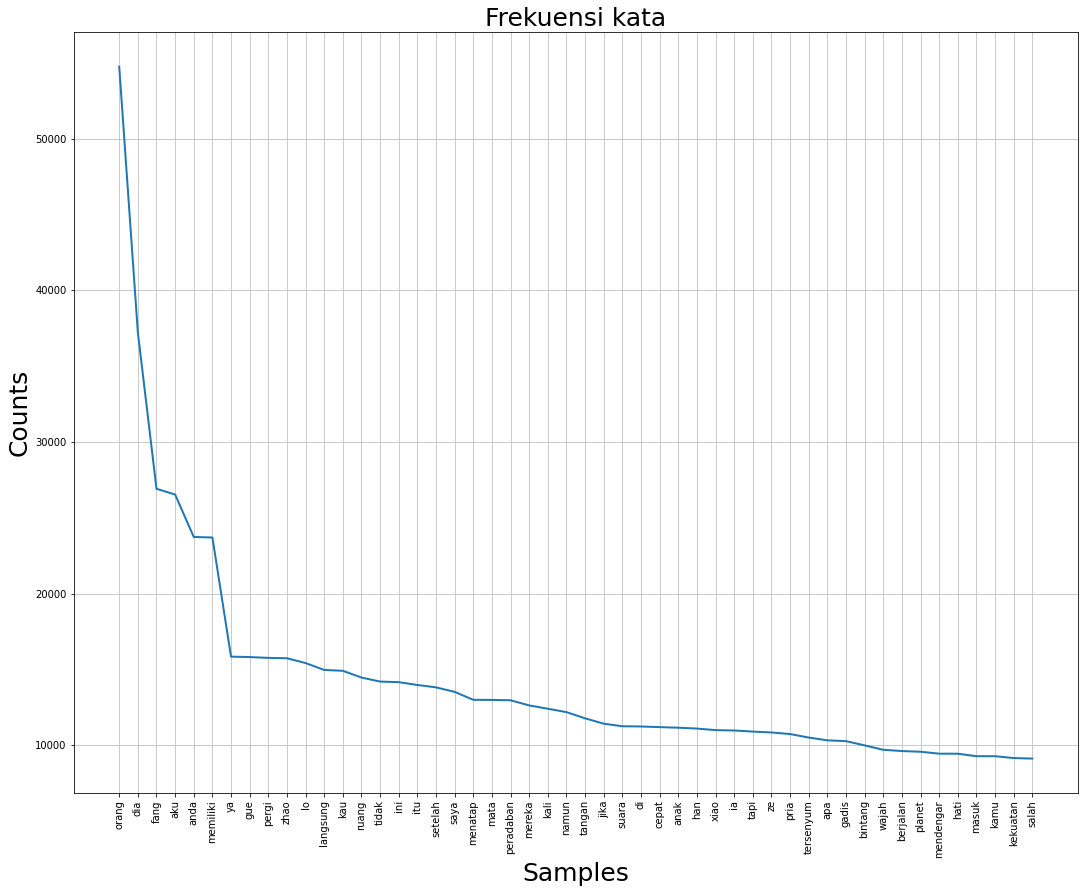

In [ ]:
from nltk.probability import FreqDist
freq_dist = FreqDist([word for text in df_clean["no_stopword_text"] for word in text.lower().split()])

 # .str.replace('([^a-za-z0-9^,!.\/+-=]|(vaksin))',' ')

plt.figure(figsize=(18, 14))
plt.title('Frekuensi kata').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(50,cumulative=False)
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169227 entries, 0 to 169226
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   label             169227 non-null  int64 
 1   no_stopword_text  169227 non-null  object
 2   total             169227 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.2+ MB


In [ ]:
tagged_1 = []
tagged_2 = []

for word in df_clean['total'] :
  tagged_word = nltk.pos_tag(word)
  tagged_1.append(tagged_word)
tagged_2.append(tagged_1)

In [ ]:
# tagged_3 = []
# tagged_4 = []

# for word in testing_data['total'] :
#   tagged_word2 = nltk.pos_tag(word)
#   tagged_3.append(tagged_word2)
# tagged_4.append(tagged_3)

In [ ]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Penggunaan Post Tag Visualizer digunakan untuk menganalisa jumlah S - P - O - K dan unsur - unsur lain pada tiap kalimat yang akan digunakan pada training model. Kami mendapatkan informasi bahwa data training didominasi oleh Kata Benda

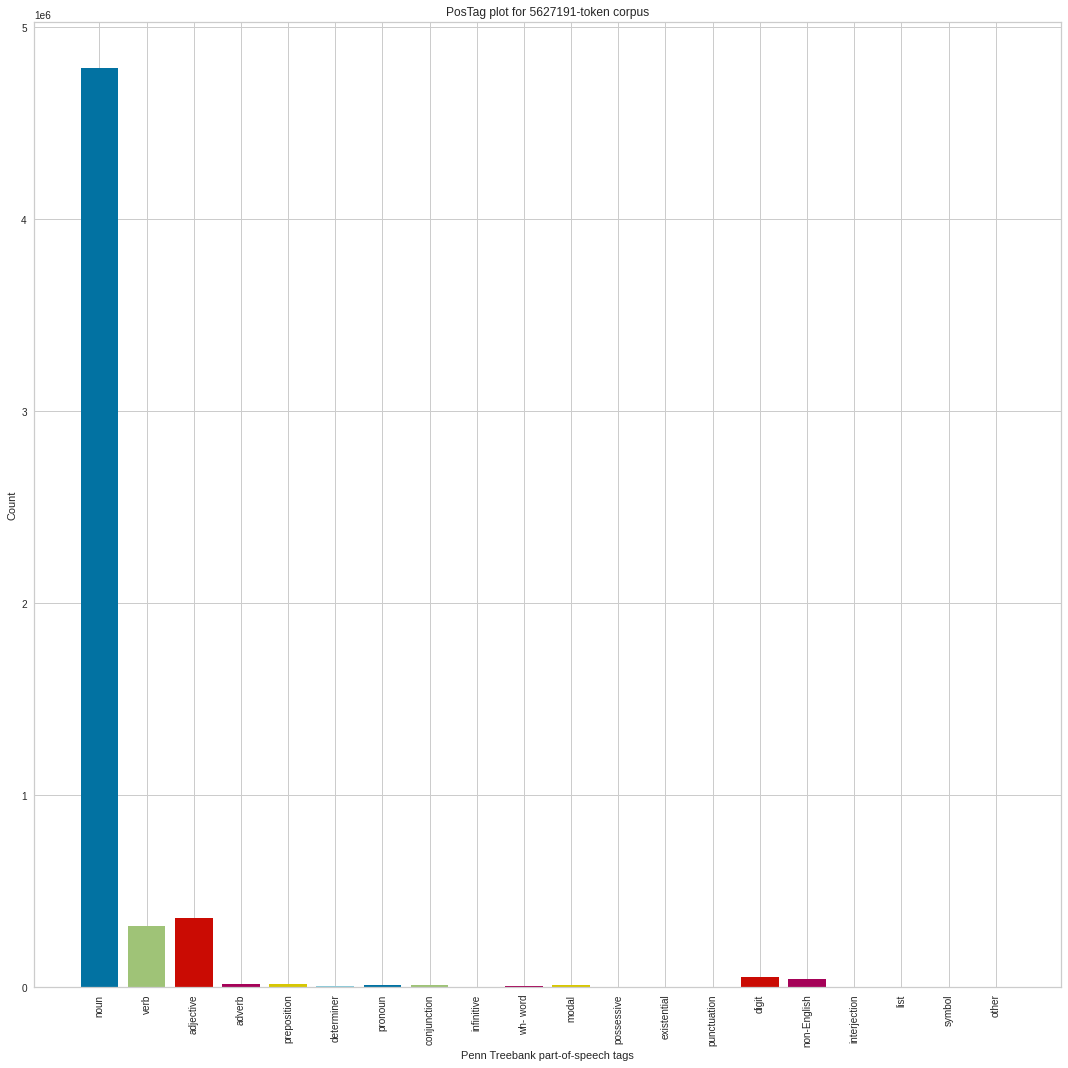

In [ ]:
from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_2)
viz.show()

In [ ]:
df_clean['label'].value_counts()

2    85532
3    36870
1    27356
0    19469
Name: label, dtype: int64

In [ ]:
from pylab import rcParams

Visualisasi Genre berfungsi untuk melihat total dominansi genre dimana kami mendapatkan informasi bahwa genre Fiksi Ilmiah

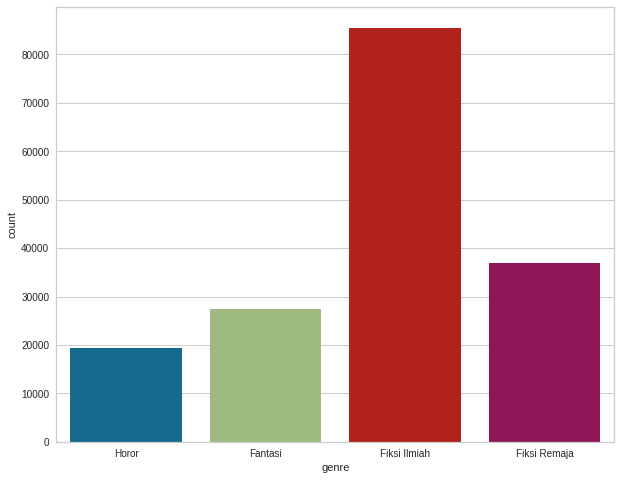

In [ ]:
rcParams["figure.figsize"] = 10,8
sns.countplot(x = df['genre'])

In [ ]:
target = df_clean['label'].values
# df_clean.drop("label", axis = 1 , inplace = True)
df_clean.head()

,label,no_stopword_text,total
0,0,gerbang tumuju petengan ingkang Nyoto Terbukal...,"[gerbang, tumuju, petengan, ingkang, Nyoto, Te..."
1,1,Miana terhenyak mengerti maksud ucapan Drayn A...,"[Miana, terhenyak, mengerti, maksud, ucapan, D..."
2,2,Gabriel betapa kuatnya membuka matanya Mata in...,"[Gabriel, betapa, kuatnya, membuka, matanya, M..."
3,3,Semua semoga Kita tau Terima takdir Tuhan teta...,"[Semua, semoga, Kita, tau, Terima, takdir, Tuh..."
4,1,Mereka bertemu pengemudi kereta berjanggut ram...,"[Mereka, bertemu, pengemudi, kereta, berjanggu..."


# Modelling

In [ ]:
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.metrics as metrics

Pada tahap pertama kami membuat fungsi yang digunakan untuk mengukur akurasi dari model yang kami buat menggunakan Evaluate Classifier

In [ ]:
def evaluate_classifier(title, classifier, vectorizer, X_test, y_test):
  X_test_tfidf = vectorizer.transform(X_test)
  y_pred = classifier.predict(X_test_tfidf)

  precision = metrics.precision_score(y_test, y_pred, average='micro')
  recall = metrics.recall_score(y_test, y_pred, average='micro')
  f1 = metrics.f1_score(y_test, y_pred, average='micro')

  print("%s\t%f\t%f\t%f\n" % (title, precision, recall, f1))

In [ ]:
df_clean

,label,no_stopword_text,total
0,0,gerbang tumuju petengan ingkang Nyoto Terbukal...,"[gerbang, tumuju, petengan, ingkang, Nyoto, Te..."
1,1,Miana terhenyak mengerti maksud ucapan Drayn A...,"[Miana, terhenyak, mengerti, maksud, ucapan, D..."
2,2,Gabriel betapa kuatnya membuka matanya Mata in...,"[Gabriel, betapa, kuatnya, membuka, matanya, M..."
3,3,Semua semoga Kita tau Terima takdir Tuhan teta...,"[Semua, semoga, Kita, tau, Terima, takdir, Tuh..."
4,1,Mereka bertemu pengemudi kereta berjanggut ram...,"[Mereka, bertemu, pengemudi, kereta, berjanggu..."
...,...,...,...
169222,1,Terlambat Arelia keburu pergi hadapan Daza Gad...,"[Terlambat, Arelia, keburu, pergi, hadapan, Da..."
169223,0,Hujan hujan alami Cakra Ini hujan ghaib Perlah...,"[Hujan, hujan, alami, Cakra, Ini, hujan, ghaib..."
169224,3,HAHAHA Maap bgt up Jan lupa vote oke Aku maksa,"[HAHAHA, Maap, bgt, up, Jan, lupa, vote, oke, ..."
169225,2,Memikirkannya memperhatikan pergerakannya Inte...,"[Memikirkannya, memperhatikan, pergerakannya, ..."


Pada fungsi Train Classifier kami menggunakan metode Multinomial Naive Bayes untuk mengklasifikasi, dimana alasan menggunakan metode ini adalah : 

1.   High Scalabilitas dalam training data
2.   Sangat efektif dalam training data diskret
Sehingga kami menggunakan Multinomial Naive Bayes Method untuk mengklasifikasikan kategori genre tersebut.

Kemudian dikarenakan Naive Bayes tidak memiliki Hyperparameter Tuning, kami menggunakan pendekatan yang mirip untuk meningkatkan akurasi yaitu dengan Vectorizer. Vectorizer akan melakukan regularisasi pada ekspresi model yang mirip dengan lasso pada linear regresi. Pada kasus ini kami menggunakan Vectorizer dengan memanfaatkan n-gram dari unigram, bigram, dan trigram untuk menganalisa sentence dengan lebih baik



In [ ]:
def train_classifier(df_clean):
  target = df_clean['label'].values

  vectorizer = CountVectorizer(ngram_range=(1, 3),min_df=3,analyzer='word')
  

  train_tfidf = df_clean['no_stopword_text'].values

  X_train,X_test,y_train,y_test = train_test_split(train_tfidf,target,random_state =0)

  # create doc-term matrix
  dtm = vectorizer.fit_transform(X_train)

  # train Naive Bayes classifier
  naive_bayes_classifier = MultinomialNB().fit(dtm, y_train)

  evaluate_classifier("Naive Bayes\tTRAIN\t", naive_bayes_classifier, vectorizer, X_train, y_train)
  evaluate_classifier("naive Bayes\tTEST\t", naive_bayes_classifier, vectorizer, X_test, y_test)

  # store the classifier
  clf_filename = 'naive_bayes_classifier.pkl'
  pickle.dump(naive_bayes_classifier, open (clf_filename, 'wb'))

  # also store the vectorizer so we can transform new data
  vec_filename = 'count_vectorizer.pkl'
  pickle.dump(vectorizer, open(vec_filename, 'wb'))

In [ ]:
train_classifier(df_clean)

Naive Bayes	TRAIN		0.974110	0.974110	0.974110

naive Bayes	TEST		0.946723	0.946723	0.946723



# Testing

In [ ]:
df_try = pd.read_csv('Prediction Case.csv')
df_try
df_num = df_try['id']
df_try = df_try.drop(['id'],axis = 1)
df_try

,text
0,"\n ""Kok udah bangun?"" tanya Aron\n\n\n ""Laper ..."
1,\n .....\n\n\n Usman ke samping rumah sebelah ...
2,"\n ""Ko cuman sebentar?"" Tanya Fiolla, dengan w..."
3,"\n Setelah Frye selesai, mereka menunggu saat ..."
4,"\n ""Percayalah Yati! Kau bersedia, kan?"" Yati ..."
...,...
3995,"\n ""Waalaikumsalam, hati hati Ron bawa mobilny..."
3996,Menghentikan satu meter di depan balok es tra...
3997,\n Terdengar suara kuda meringkik. Kuda yang k...
3998,\n Meski hanya terjadi sesaat.\n\n\n Tapi itu ...


In [ ]:
df_try

,text
0,"\n ""Kok udah bangun?"" tanya Aron\n\n\n ""Laper ..."
1,\n .....\n\n\n Usman ke samping rumah sebelah ...
2,"\n ""Ko cuman sebentar?"" Tanya Fiolla, dengan w..."
3,"\n Setelah Frye selesai, mereka menunggu saat ..."
4,"\n ""Percayalah Yati! Kau bersedia, kan?"" Yati ..."
...,...
3995,"\n ""Waalaikumsalam, hati hati Ron bawa mobilny..."
3996,Menghentikan satu meter di depan balok es tra...
3997,\n Terdengar suara kuda meringkik. Kuda yang k...
3998,\n Meski hanya terjadi sesaat.\n\n\n Tapi itu ...


In [ ]:
# memasukkan classifier 
clf_filename = 'naive_bayes_classifier.pkl'
nb_clf = pickle.load(open(clf_filename, 'rb'))

# memvectorized text baru
vec_filename = 'count_vectorizer.pkl'
vectorizer = pickle.load(open(vec_filename, 'rb'))
labeled = []
for word in df_try['text']:
  pred = nb_clf.predict(vectorizer.transform([word]))
  labeled.append(pred)

In [ ]:
final = pd.DataFrame(labeled, columns = ['label'])
result = pd.concat([df_try,final], axis=1, join='inner')
result

,text,label
0,"\n ""Kok udah bangun?"" tanya Aron\n\n\n ""Laper ...",3
1,\n .....\n\n\n Usman ke samping rumah sebelah ...,0
2,"\n ""Ko cuman sebentar?"" Tanya Fiolla, dengan w...",3
3,"\n Setelah Frye selesai, mereka menunggu saat ...",2
4,"\n ""Percayalah Yati! Kau bersedia, kan?"" Yati ...",0
...,...,...
3995,"\n ""Waalaikumsalam, hati hati Ron bawa mobilny...",3
3996,Menghentikan satu meter di depan balok es tra...,2
3997,\n Terdengar suara kuda meringkik. Kuda yang k...,1
3998,\n Meski hanya terjadi sesaat.\n\n\n Tapi itu ...,2


In [ ]:
conditions = [
    (result['label'] == 0),
    (result['label'] == 1),
    (result['label'] == 2),
    (result['label'] == 3)
]

values = ["Horor","Fantasi","Fiksi Ilmiah","Fiksi Remaja"]

result['genre'] = np.select(conditions, values)
result

,text,label,genre
0,"\n ""Kok udah bangun?"" tanya Aron\n\n\n ""Laper ...",3,Fiksi Remaja
1,\n .....\n\n\n Usman ke samping rumah sebelah ...,0,Horor
2,"\n ""Ko cuman sebentar?"" Tanya Fiolla, dengan w...",3,Fiksi Remaja
3,"\n Setelah Frye selesai, mereka menunggu saat ...",2,Fiksi Ilmiah
4,"\n ""Percayalah Yati! Kau bersedia, kan?"" Yati ...",0,Horor
...,...,...,...
3995,"\n ""Waalaikumsalam, hati hati Ron bawa mobilny...",3,Fiksi Remaja
3996,Menghentikan satu meter di depan balok es tra...,2,Fiksi Ilmiah
3997,\n Terdengar suara kuda meringkik. Kuda yang k...,1,Fantasi
3998,\n Meski hanya terjadi sesaat.\n\n\n Tapi itu ...,2,Fiksi Ilmiah


In [ ]:
submission = pd.concat([df_num,result],axis = 1 , join='inner')
submission = submission.drop(['text','label'], axis=1)
submission
submission.to_csv('submission12.csv',index = False)
!cp submission12.csv "/content/drive/MyDrive/Dataset Data Science Teti"

cp: 'submission12.csv' and '/content/drive/MyDrive/Dataset Data Science Teti/submission12.csv' are the same file


In [ ]:
testing = pd.read_csv("submission7.csv")
testing['genre'].value_counts()

Fiksi Ilmiah    1165
Fiksi Remaja    1019
Fantasi          966
Horor            850
Name: genre, dtype: int64

In [ ]:
testing2= pd.read_csv('submission3.csv')
testing2['genre'].value_counts()

Fiksi Ilmiah    1789
Fiksi Remaja    1022
Fantasi          642
Horor            547
Name: genre, dtype: int64

In [ ]:
testing2= pd.read_csv('submission12.csv')
testing2['genre'].value_counts()

Fiksi Ilmiah    1320
Fiksi Remaja    1023
Fantasi          871
Horor            786
Name: genre, dtype: int64